#Deep Learning based Temporal Causal Discovery from Non-stationary Non-linear Time Series Data (Synthetic Dataset 2)


This notebook contains the proposed model. Here we have developed the proposed Causal Conv2D layer and the optimization function.

The functions to visualize the predicted causal graph are available after the model training codes. The predicted graph is compared with ground truth using an adjacency matrix (array).   

In this notebook, we applied the proposed model to the synthetic dataset-2 to generate a full causal graph and summary graph.

In [ ]:
t = 100000

#Create noise
import numpy as np
import pandas as pd

np.random.seed(1001)
np.set_printoptions(suppress=True)
noise = np.random.poisson(lam=1.0, size=(t)) #np.random.exponential(scale=1.0, size=(t)) # np.random.normal(0,1,t)
noise = noise
print(noise.size)
#Variable 1
source1 = np.zeros((t))
source1_1st_term = np.zeros((t))
import math
source1[0] = noise[0] +10
source1[1] = noise[1] +10
source1[2] = noise[2] +10
for x in range(3,t):
  #print(x)
  if(x<5):
    source1_1st_term[x] = 0.5*math.sqrt(2)*math.exp(-source1[x-2]*source1[x-2]/2)
    source1[x] = 0.5*math.sqrt(2)*math.exp(-source1[x-2]*source1[x-2]/2) + noise[x]
  else:
    #print((source1[x-5]*source1[x-5])*(-source1[x-2]*source1[x-2])/2)
    source1_1st_term[x] = 0.5*math.sqrt(2)*math.exp((source1[x-5]*source1[x-5])*(-source1[x-2]*source1[x-2])/2) #2*math.sqrt(2)*math.exp(-source1[x-5]*source1[x-5]/2)
    source1[x] = 0.5*math.sqrt(2)*math.exp((source1[x-5]*source1[x-5])*(-source1[x-2]*source1[x-2])/2) + noise[x]

#Variable 2
source2 = np.zeros((t))
source2_1st_term = np.zeros((t))
np.set_printoptions(suppress=True)
noise2 = np.random.poisson(lam=1.0, size=(t)) # np.random.normal(0,1,t)
#noise2 = noise2 /2
import math
source2[1] = noise2[1]
source2[2] = noise2[2]
for x in range(3,t):
  if source1[x-1] > 0:
    source2_1st_term[x] = 2.2*math.exp(-source1[x-1]*source1[x-1]/2)+ 0.5*math.exp(-source1[x]*source1[x]/2)
    source2[x] = 2.2*math.exp(-source1[x-1]*source1[x-1]/2) + noise2[x]+ 0.5*math.exp(-source1[x]*source1[x]/2)
  else:
    source2_1st_term[x] = -2*math.exp(-source1[x-1]*source1[x-1])+ 0.5*math.exp(-source1[x]*source1[x]/2)
    source2[x] = -2*math.exp(-source1[x-1]*source1[x-1]) + noise2[x]+ 0.5*math.exp(-source1[x]*source1[x]/2)

#Variable 3
source3 = np.zeros((t))
source3_1st_term = np.zeros((t))
np.set_printoptions(suppress=True)
noise3 = np.random.poisson(lam=1.0, size=(t)) # np.random.normal(0,1,t)
noise3 = noise3 /2
import math
source3[1] = noise3[1]
source3[2] = noise3[2]
for x in range(3,t):
  source3_1st_term[x] = -5.05*math.exp(-source1[x-1]*source1[x-1]/2)
  source3[x] = -5.05*math.exp(-source1[x-1]*source1[x-1]/2) + noise3[x]

#Variable 4
source4 = np.zeros((t))
source4_1st_term = np.zeros((t))
np.set_printoptions(suppress=True)
noise4 = np.random.poisson(lam=1.0, size=(t)) # np.random.normal(0,1,t)
noise4 = noise4 /2
import math
source4[1] = noise4[1] + 10
source4[2] = noise4[2] + 10
for x in range(3,t):
  source4_1st_term[x] = -1.15*math.exp(-source1[x-1]*source1[x-1]/2) + 1.5*math.sqrt(2)*math.exp(-source4[x-1]*source4[x-1]/2) + 2.35*math.exp(-source3[x-1]*source3[x-1]/2) + 3*math.exp(-source3[x]*source3[x]/2)
  source4[x] = -1.15*math.exp(-source1[x-1]*source1[x-1]/2) + 1.5*math.sqrt(2)*math.exp(-source4[x-1]*source4[x-1]/2) + 2.35*math.exp(-source3[x-1]*source3[x-1]/2) + noise4[x] + 3*math.exp(-source3[x]*source3[x]/2)


#combining data
dict={'S1':source1,'S2':source2,'S3':source3,'S4':source4,'noise1':noise,'noise2':noise2,'noise3':noise3,'noise4':noise4}
data=pd.DataFrame(dict)
data.to_csv('synthetic_2nd_dataset.csv',header=True,index=False)
from google.colab import files
#files.download( "synthetic_2nd_dataset.csv" )

In [ ]:
data.iloc[10000:10010,:]

,S1,S2,S3,S4,noise1,noise2,noise3,noise4
10000,14.642136,9.501468e+00,8.486597e+00,10.895058,0.5,0.5,0.5,1
10001,14.642136,3.959384e-46,5.000000e-01,-0.647491,0.5,0.0,0.5,2
10002,0.500000,4.029988e+00,1.000000e+00,7.571438,0.5,0.5,1.0,1
10003,0.500000,1.403146e+01,7.986597e+00,9.789798,0.5,1.5,0.0,2
10004,13.707028,9.001468e+00,7.986597e+00,5.544859,0.0,0.0,0.0,1
10005,0.500000,4.529988e+00,5.000000e-01,0.352510,0.5,1.0,0.5,3
10006,0.500000,1.303146e+01,8.986597e+00,14.519082,0.5,0.5,1.0,1
10007,13.707028,9.001468e+00,7.986597e+00,5.544859,0.0,0.0,0.0,1
10008,14.207028,1.623932e-40,1.440316e-40,-0.999999,0.5,0.0,0.0,2
10009,0.000000,4.000000e+00,1.341923e-43,6.094847,0.0,0.0,0.0,1


In [ ]:
import scipy.io

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, (m*m)/(sd*sd))



In [ ]:
data_np = data.to_numpy()

In [ ]:
snr1 = signaltonoise(data_np[:,0])
snr2 = signaltonoise(data_np[:,1])
snr3 = signaltonoise(data_np[:,2])
snr4 = signaltonoise(data_np[:,3])

In [ ]:
snr1, snr2, snr3, snr4

(array(1.69822276), array(3.3130597), array(1.14746314), array(1.93885138))

In [ ]:
true_graph = np.zeros((4,4))
true_graph[0,0]=1
true_graph[0,1]=1
true_graph[0,2]=1
true_graph[0,3]=1
true_graph[2,3]=1
true_graph[3,3]=1
true_graph

array([[1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
true_full_graph = np.zeros((4,24))
true_full_graph[0,0]=1
true_full_graph[0,12]=1

true_full_graph[1,16]=1
true_full_graph[1,20]=1

true_full_graph[2,16]=1

true_full_graph[3,16]=1
true_full_graph[3,18]=1
true_full_graph[3,19]=1
true_full_graph[3,22]=1
true_full_graph


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 0., 0., 1., 0.]])

In [ ]:
!pip install cdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=d404e08ac273e16d59a42e03114923a8d261d0cde3971106ca0ee1e7aeb8eda0
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29255 sha256=c59cf66a632c233cf4b3e002af0e7b134535eeed8019a6ef13f46c85cd8f0ee5
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built GPUtil skrebate


In [ ]:
import cdt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


#Data Pre-processing

In [ ]:
import numpy as np
import pandas as pd

def data_preprocessing(data, max_lag=5):
  from sklearn.preprocessing import MinMaxScaler

  #convert to numpy array
  syn_data_np = data.to_numpy()

  #normalize the dataset
  scaler_X = MinMaxScaler(feature_range=(0, 1))
  syn_data_np_nor = scaler_X.fit_transform(syn_data_np)
  syn_data_np = syn_data_np_nor

  #transform into 2D data
  syn_data_np_T= syn_data_np.T
  syn_data_pro = np.zeros((syn_data_np.shape[0]-max_lag,syn_data_np.shape[1],(max_lag+1)))
  for i in range(0, (syn_data_np.shape[0]-max_lag)):
    syn_data_pro[i,:,:]= syn_data_np_T[:, i:i+(max_lag+1)]
  syn_data_2d = np.expand_dims(syn_data_pro, axis =-1)

  #make datafrom with normalized data
  syn_data_nor_df =pd.DataFrame(data = syn_data_np,
                  columns = data.columns)

  #transform normalized data into 1D shape with lagged and current time values
  size_1d = syn_data_np.shape[1]*(max_lag+1)
  print(size_1d)
  syn_data_1d = np.zeros((syn_data_np.shape[0]-max_lag,size_1d))
  for i in range(0, (syn_data_np.shape[0]-max_lag)):
    for j in range(0,(max_lag+1)):
      j_end = j * syn_data_np.shape[1]
      syn_data_1d[i,j_end:j_end+syn_data_np.shape[1]]= syn_data_np[i+j, :]

  #transform non-normalized data into 1D shape with lagged and current time values
  syn_data_np_2 = data.to_numpy()
  syn_data_1d_not_norm = np.zeros((syn_data_np_2.shape[0]-max_lag,size_1d))
  for i in range(0, (syn_data_np_2.shape[0]-max_lag)):
    for j in range(0,(max_lag+1)):
      j_end = j * syn_data_np_2.shape[1]
      syn_data_1d_not_norm[i,j_end:j_end+syn_data_np_2.shape[1]]= syn_data_np_2[i+j, :]


  return syn_data_np_nor, syn_data_2d, syn_data_nor_df, syn_data_1d,  syn_data_1d_not_norm

In [ ]:
syn_data_np, syn_data_2d, syn_data_nor_df, syn_data_1d,  syn_data_1d_not_norm = data_preprocessing(data, max_lag=5)

12


In [ ]:
syn_data_2d.shape

(99998, 4, 3, 1)

In [ ]:
syn_data_np_nor.shape

(100000, 4)

In [ ]:
syn_data_nor_df.shape

(100000, 4)

In [ ]:
syn_data_1d.shape

(99998, 12)

In [ ]:
syn_data_1d_not_norm.shape

(99998, 12)

In [ ]:
syn_data_np.shape, syn_data_2d.shape

((100000, 4), (99995, 4, 6, 1))

In [ ]:
data_y_syn = syn_data_np[5:,0:4]
data_y_syn.shape

(99995, 4)

# Model

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AveragePooling2D, LSTM, Activation, ConvLSTM2D, TimeDistributed, Input, Reshape
from keras.layers import UpSampling1D, Conv2DTranspose, UpSampling2D, Conv1D, AveragePooling1D, LeakyReLU
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
import keras.backend as K
import tensorflow as tf
from keras.layers import concatenate
from keras.regularizers import l1, l2
from time import time

keras.utils.set_random_seed(1001)

In [ ]:
import tensorflow_probability as tfp

In [ ]:
class CausalConv2D(tf.keras.layers.Layer):
    def __init__(self, num_outputs, counter, *args, **kwargs):
        super(CausalConv2D, self).__init__()
        self.conv2d = tf.keras.layers.Conv2D(*args, **kwargs)
        self.num_outputs = num_outputs
        self.counter = counter

    def build(self, input_shape):
        self.W=self.add_weight(name='kernel',
                           shape=(input_shape[1], input_shape[2],input_shape[3], 1),
                           #initializer = keras.initializers.RandomUniform(minval=0.05, maxval=0.5),
                           #initializer ='uniform',
                           initializer = tf.keras.initializers.glorot_uniform(seed=8),
                           trainable=True)
        self.mask = np.ones(shape=self.W.shape)
        print(self.W)
        self.mask[self.counter,(input_shape[2]-1),...] = 0.0

    #def masked_convolution_op(self, filters, kernel, mask):
    #    return self._convolution_op(filters, tf.math.multiply(kernel, tf.reshape(mask, mask.shape + [1,1] )))

    def get_weights(self):
        return super().get_weights()

    def call(self, inputs):
        self.W.assign(tf.math.multiply(self.W, self.mask))
        #self.conv2d._convolution_op = functools.partial(self.masked_convolution_op, mask=mask)
        #return self.conv2d.call(x)
        return self.conv2d.convolution_op(inputs, self.W)

In [ ]:
# 2D
def get_model_2d(input_dims):
    input_batch = Input(shape = input_dims)

    conv_model = Sequential()
    conv_model = Conv2D(filters=4, kernel_size=1, strides=(1,1), padding='valid', activation="linear", name='conv1')(input_batch)
    #conv_model = AveragePooling2D(pool_size=(1,1), strides=None, padding='valid', name='pool1')(conv_model) activation=LeakyReLU(0.05)
    conv_model = tf.math.reduce_mean(conv_model, axis=-1)
    conv_model = Reshape((4, 6, 1))(conv_model)
    #conv_model = Flatten()(conv_model )
    pooled_outputs = []
    for i in range(0, 4):
      #layer = CausalConv2D(num_outputs=1, counter=i, name="parr"+str(i))(conv_model) # , kernel_regularizer = l1(0.2)
      layer = CausalConv2D(filters=1, kernel_size=(4,6), num_outputs=1, counter=i, padding='valid', activation="sigmoid",)(conv_model)
      #den1 = layer(tf.ones([481, 30]))
      #conv = Conv2D(1, kernel_size=filter_sizes[i], padding='valid', activation='relu')(conv_model)
      pooled_outputs.append(layer)
    output = concatenate(pooled_outputs)
    output = Flatten()(output)

    model = Model(inputs=input_batch, outputs=output, name='cpred')

    return model

In [ ]:
# with gradient tape

class CausalNNModel(object):
    def __init__(self,
                 dims,
                 alpha=0.0,
                 rho = 1.0,
                 rho_max = 10e20,
                 h_tol = 1e-8,
                 init='glorot_uniform'):

        super(CausalNNModel, self).__init__()

        self.dims = dims
        self.n_stacks = len(self.dims) - 1
        self.alpha = alpha
        self.rho = rho
        self.h_p = np.Inf
        self.rho_max = rho_max
        self.h_tol = h_tol
        self.model_2d = get_model_2d(self.dims)
        print("====Model created=====")

        self.model = Model(inputs=self.model_2d.input, outputs=self.model_2d.output)


    def extract_features(self, x):
        return self.model_cnn.predict(x)

    def predict(self, x):  # predict cluster labels using the output of clustering layer
        q = self.model.predict(x, verbose=0)[1]
        return q.argmax(1)

    def custom_loss_function(self, y_true, y_pred):
      mse = keras.losses.mean_squared_error(y_true, y_pred)
      h_val = self.causal_loss_h()
      h_loss = 0.5 * self.rho * h_val * h_val + self.alpha * h_val
      lambda1 = 0.1
      adj_mat = self.get_mat()
      sparse_loss = lambda1 * tf.math.reduce_sum(tf.abs(adj_mat))
      #neg_weight = np.sum(adj_mat, where=adj_mat<0)
      #neg_loss = 0.5 * tf.abs(neg_weight)
      print('MSE Loss is: {}, h Loss is: {}, L1 loss: {}, Total Loss is: {}'.format(tf.reduce_mean(mse), h_loss, sparse_loss, tf.reduce_mean(mse)+h_loss))
      return mse + h_loss + sparse_loss #+ neg_loss

    def causal_loss_h(self):
      mat = self.get_mat()
      h_val = self.h_acy_1(mat[:, 20:])
      return h_val

    def get_mat(self):
      w1_2d_s = self.model.get_layer(index=-6).get_weights()
      w2_2d_s = self.model.get_layer(index=-5).get_weights()
      w3_2d_s = self.model.get_layer(index=-4).get_weights()
      w4_2d_s = self.model.get_layer(index=-3).get_weights()
      arr1_2d_s = np.expand_dims(np.squeeze(np.array(w1_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr2_2d_s = np.expand_dims(np.squeeze(np.array(w2_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr3_2d_s = np.expand_dims(np.squeeze(np.array(w3_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr4_2d_s = np.expand_dims(np.squeeze(np.array(w4_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      mat_2d_s = np.concatenate((arr1_2d_s, arr2_2d_s, arr3_2d_s, arr4_2d_s))
      #print(mat_2d_s)
      return mat_2d_s

    def h_acy_1(self, A):
      n_var = A.shape[0]
      h = tf.linalg.trace(tf.linalg.expm(A * A)) - n_var
      return h


    def h_acy(self, A):
      '''Calculate the constraint of A ensure that it's a DAG'''
      #(Yu et al. 2019 DAG-GNN)
      # h(w) = tr[(I + kA*A)^n_variables] - n_variables
      n_var = A.shape[0]
      M = tf.eye(n_var, num_columns = n_var) + A/n_var
      E = M
      for _ in range(n_var - 2):
        E = tf.linalg.matmul(E, M)
      h = tf.math.reduce_sum(tf.transpose(E) * M) - n_var
      return h

    def compile(self, optimizer='adam'):
        self.model.compile(optimizer=optimizer, loss= self.custom_loss_function) # ['mse', self.causal_loss()])

    def fit(self, x, y=None, maxiter=100, batch_size=512, save_dir='./results/temp'):
        t1 = time()


        # Step 2: deep clustering
        # logging file
        import csv
        logfile = open(save_dir + '/causalnn_log.csv', 'w')
        logwriter = csv.DictWriter(logfile, fieldnames=['iter','loss'])
        logwriter.writeheader()
        train_loader = tf.data.Dataset.from_tensor_slices((x, y)).batch(batch_size)
        optimizer = tf.keras.optimizers.Adam(1e-2)
        w1_2d_s = self.model.get_layer(index=-6).get_weights()
        arr1_2d_s = np.expand_dims(np.squeeze(np.array(w1_2d_s), axis=(0,3,4)).flatten('F'), axis=0)


        for epoch in range(int(maxiter)):
          print('Epoch: {}', epoch)
          h_n = None
          for (x, y) in train_loader:
            #eval loss and compute gradients
            with tf.GradientTape() as tape:
              tape.watch(self.model.trainable_variables)
              #passing through neural network
              output = self.model(x)
              #calculate loss
              loss = self.custom_loss_function(y, output)
              gradients = tape.gradient(loss, self.model.trainable_variables)
              optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
              h_n = self.causal_loss_h()
              #print('New h_val is :', h_n)
              #if h_n > 0.25 * self.h_p:
              #  self.rho = self.rho*10
              #else:
              #  break

          if h_n > 0.25 * self.h_p:
                self.rho = self.rho*1.1
          self.h_p = h_n
          print('New h_val is :', h_n)
          self.alpha += self.rho * self.h_p

          if self.h_p <= self.h_tol or self.rho >= self.rho_max:
            print('Before the loop end # h_val is: {}, rho is: {}'.format(self.h_p, self.rho))
            break

        #for ite in range(int(maxiter)):
        #  print('Epoch: {}', ite)
        #  self.model.fit(x, y, epochs=1, batch_size=batch_size, verbose=True)

        # save the trained model
        logfile.close()
        file_name  = "/CausalNN_model_final_" + str(round(time()))+ ".h5"
        print('saving model to:', save_dir + file_name)
        self.model.save_weights(save_dir + file_name)

        w1_2d_s_1 = self.model.get_layer(index=-6).get_weights()
        arr1_2d_s_1 = np.expand_dims(np.squeeze(np.array(w1_2d_s_1), axis=(0,3,4)).flatten('F'), axis=0)

        y_pred = self.model.predict(x)
        adj_mat = self.get_mat()

        print('The conv layer 1 weights before training :', arr1_2d_s)
        print('The conv layer 1 weights after training :', arr1_2d_s_1)

        return y_pred, adj_mat

#Model creation and training:

In [ ]:
keras.utils.set_random_seed(1001)

cnnmodel = CausalNNModel(dims=syn_data_2d.shape[1:])

<tf.Variable 'causal_conv2d_20/kernel:0' shape=(4, 6, 1, 1) dtype=float32, numpy=
array([[[[ 0.01729116]],

        [[ 0.05369946]],

        [[-0.11558445]],

        [[-0.1930318 ]],

        [[-0.22727013]],

        [[-0.10506889]]],


       [[[-0.03241783]],

        [[ 0.34967968]],

        [[-0.22822307]],

        [[ 0.18624505]],

        [[-0.03919902]],

        [[-0.03960952]]],


       [[[ 0.20739552]],

        [[-0.14644605]],

        [[ 0.21469983]],

        [[-0.17902574]],

        [[ 0.06509387]],

        [[ 0.17076865]]],


       [[[ 0.21393666]],

        [[-0.3412853 ]],

        [[ 0.0880048 ]],

        [[-0.3153036 ]],

        [[-0.07369781]],

        [[ 0.15640828]]]], dtype=float32)>
<tf.Variable 'causal_conv2d_21/kernel:0' shape=(4, 6, 1, 1) dtype=float32, numpy=
array([[[[ 0.01729116]],

        [[ 0.05369946]],

        [[-0.11558445]],

        [[-0.1930318 ]],

        [[-0.22727013]],

        [[-0.10506889]]],


       [[[-0.03241783]],

     

In [ ]:
cnnmodel.model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 4, 6, 1)]            0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 4, 6, 4)              8         ['input_6[0][0]']             
                                                                                                  
 tf.math.reduce_mean_5 (TFO  (None, 4, 6)                 0         ['conv1[0][0]']               
 pLambda)                                                                                         
                                                                                                  
 reshape_5 (Reshape)         (None, 4, 6, 1)              0         ['tf.math.reduce_mean_5[

In [ ]:
cnnmodel.compile()

In [ ]:
y_pred, mat = cnnmodel.fit(x=syn_data_2d, y=data_y_syn, maxiter=25, batch_size=2048, save_dir='/content/')

Epoch: {} 0
MSE Loss is: 0.09585773944854736, h Loss is: 1.003495640361507e-06, L1 loss: 1.4565690755844116, Total Loss is: 0.09585874527692795
MSE Loss is: 0.09111841022968292, h Loss is: 1.1561634210011107e-06, L1 loss: 1.4485690593719482, Total Loss is: 0.09111956506967545
MSE Loss is: 0.08848144859075546, h Loss is: 1.3918680679125828e-06, L1 loss: 1.4417228698730469, Total Loss is: 0.08848284184932709
MSE Loss is: 0.08863845467567444, h Loss is: 1.7755955923348665e-06, L1 loss: 1.437688946723938, Total Loss is: 0.0886402279138565
MSE Loss is: 0.08831506967544556, h Loss is: 2.377456439717207e-06, L1 loss: 1.4386862516403198, Total Loss is: 0.08831744641065598
MSE Loss is: 0.08610644936561584, h Loss is: 3.251569069107063e-06, L1 loss: 1.445637583732605, Total Loss is: 0.0861096978187561
MSE Loss is: 0.08261927962303162, h Loss is: 4.4807716221839655e-06, L1 loss: 1.4577423334121704, Total Loss is: 0.08262375742197037
MSE Loss is: 0.07731837034225464, h Loss is: 6.1483337958634365e

In [ ]:
mat.shape

(4, 24)

In [ ]:
mat_df_2d_s = pd.DataFrame(mat)

In [ ]:
mat_f_df = pd.DataFrame(mat).T

In [ ]:
mat_df_2d_s.T

,0,1,2,3
0,0.060424,-0.086885,0.158718,-0.023992
1,-0.071343,0.219383,-0.102552,-0.049103
2,0.197360,0.230671,0.013068,-0.011465
3,-0.518587,0.195263,0.023268,-0.004621
4,0.416361,0.019698,0.006211,0.048413
5,-0.010432,0.209990,-0.004963,-0.034856
6,-0.019452,0.071430,0.007873,-0.011133
7,0.013019,-0.285973,-0.074198,-0.009662
8,0.215037,-0.135168,0.307494,-0.130542
9,-0.031971,0.131829,0.021005,-0.069707


In [ ]:
mat_f_df.iloc[20:,:]

,0,1,2,3
20,0.000000,-0.173380,0.080703,-0.061715
21,-0.095194,0.000000,0.037806,-0.136843
22,0.069021,0.172888,0.000000,0.835213
23,-0.108998,-0.878886,2.633786,0.000000


#Full Causal Graph

In [ ]:
matrix_2d_2d_s = mat

In [ ]:
import networkx as nx
G_2d_s = nx.DiGraph()

nodes_2d_s = ["S1(t-5)", "S2(t-5)", "S3(t-5)",  "S4(t-5)",
         "S1(t-4)", "S2(t-4)", "S3(t-4)",  "S4(t-4)",
         "S1(t-3)", "S2(t-3)", "S3(t-3)",  "S4(t-3)",
         "S1(t-2)", "S2(t-2)", "S3(t-2)",  "S4(t-2)",
         "S1(t-1)", "S2(t-1)", "S3(t-1)",  "S4(t-1)",
         "S1(t)", "S2(t)", "S3(t)",  "S4(t)"]
nodes_r_2d_s=["S1(t)", "S2(t)", "S3(t)",  "S4(t)"]
pred_graph_f = np.zeros((4,24))

In [ ]:
for i in range (0, 24):
  G_2d_s.add_node(nodes_2d_s[i],pos=(int(i/4)+1,(i%4)+1))

In [ ]:
for i in range(0, 24):
  for j in range (0, 4):
    if matrix_2d_2d_s[j,i] > 0.3:
      print(i,j, matrix_2d_2d_s[j,i])
      G_2d_s.add_edge(nodes_2d_s[i], nodes_r_2d_s[j], weight=i)
      pred_graph_f[j,i]=1


In [ ]:
pos_2d_s=nx.get_node_attributes(G_2d_s,'pos')
#pos_2d_s

In [ ]:
weights_2d_s = nx.get_edge_attributes(G_2d_s,'weight').values()

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


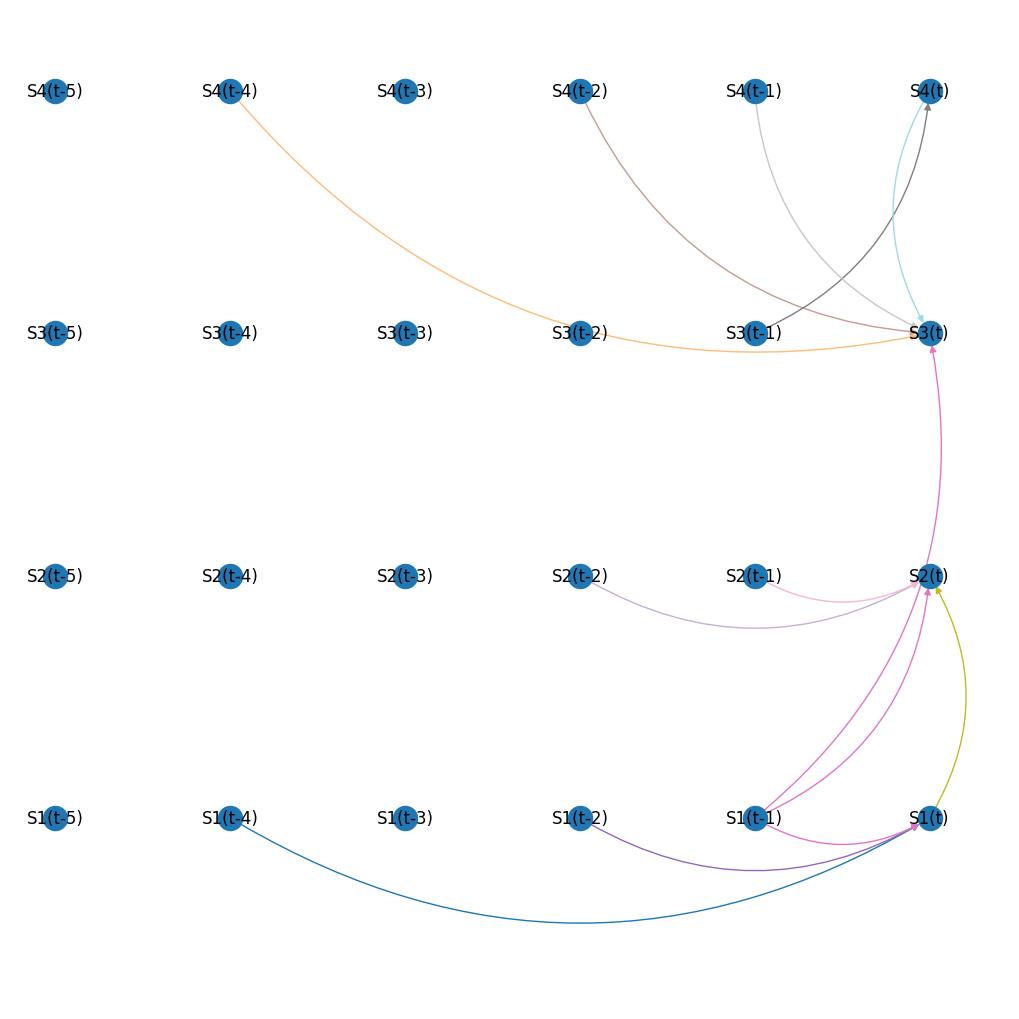

In [ ]:
#Dataset V2 Full
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw(G_2d_s, pos_2d_s, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
cdt.metrics.SHD(true_full_graph, pred_graph_f)

7.0

In [ ]:
true_values = true_full_graph
predictions = pred_graph_f

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.9270833333333334, Precision: 0.75, Recall: 0.3333333333333333, FDR: 0.25, F1 Score: 0.46153846153846156


#Summary Causal Graph

In [ ]:
import networkx as nx
G_2d_s1 = nx.DiGraph()

nodes_2d_s1 = ["S1", "S2", "S3",  "S4"]
nodes_r_2d_s1= ["S1", "S2", "S3",  "S4"]
edges_2d_s1 = []
pred_graph_s1 = np.zeros((4,4))

In [ ]:
for i in range (0, 4):
  G_2d_s1.add_node(nodes_2d_s1[i],pos=(int(i/2)+1,(i%2)+1))

In [ ]:
for i in range(0, 24):
  for j in range (0, 4):
    if matrix_2d_2d_s[j,i] > 0.3:
      print(i,j)
      col = np.round(matrix_2d_2d_s[j,i], 2)
      G_2d_s1.add_edge(nodes_2d_s1[i%4], nodes_r_2d_s1[j], weight=1)
      pred_graph_s1[i%4, j]=1


In [ ]:
pos_2d_s1=nx.get_node_attributes(G_2d_s1,'pos')
pos_2d_s1

{'S1': (1, 1), 'S2': (1, 2), 'S3': (2, 1), 'S4': (2, 2)}

In [ ]:
weights_2d_s1 = nx.get_edge_attributes(G_2d_s1,'weight').values()

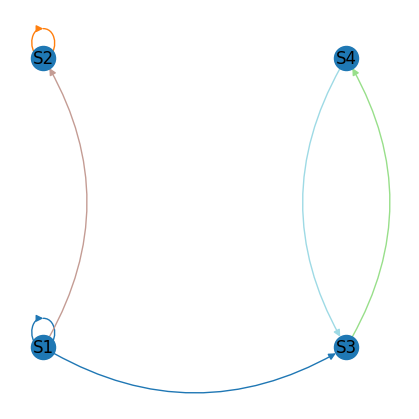

In [ ]:
#Dataset V2 Summary
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
nx.draw(G_2d_s1, pos_2d_s1, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

In [ ]:
cdt.metrics.SHD(true_graph, pred_graph_s1)

4.0

In [ ]:
true_values = true_graph
predictions = pred_graph_s1

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.75, Precision: 0.75, Recall: 0.5, FDR: 0.25, F1 Score: 0.6
